In [5]:
# -----------------------------------------------
# 💾 Load Cleaned Job Data
# -----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned JSON
df = pd.read_json("../data/jobs_cleaned.json")
df.head(3)

,id,epoch,Posted Date,Company,Job Title,Description,Location,salary_min,salary_max,apply_url,original,verified
0,1093353,1749722402,1749722402000,Jito Foundation,Head of APAC BD,"<p><b style=""font-size: 18px;"">About Jito Foun...","Remote, Singapore &Amp; Hk Preferred - Other A...",40000,80000,https://remoteOK.com/remote-jobs/remote-head-o...,NaN,NaN
1,1093348,1749664804,1749664804000,Toku,Token Plan Administrator,"<p><span style=""font-size: 11pt"">We are lookin...",United States,50000,70000,https://remoteOK.com/remote-jobs/remote-token-...,NaN,NaN
2,1093329,1749448804,1749448804000,Ontario Securities Commission,Senior Crypto and Open Source Intelligence Spe...,"Business Unit Regular, Full time Closing Date:...",Ca On Toronto,40000,80000,https://remoteOK.com/remote-jobs/remote-senior...,NaN,NaN


In [6]:
# -----------------------------------------------
# 📈 Basic Salary Overview
# -----------------------------------------------
# Calculate average salary
df["avg_salary"] = (df["salary_min"] + df["salary_max"]) / 2

# Drop rows where both min and max salaries are missing
df = df.dropna(subset=["salary_min", "salary_max"], how='all')

df[["salary_min", "salary_max", "avg_salary"]].describe()

,salary_min,salary_max,avg_salary
count,52.000000,52.000000,52.000000
mean,60576.923077,95192.307692,77884.615385
std,25613.144721,31486.248764,27626.201577
min,0.000000,0.000000,0.000000
25%,44375.000000,70000.000000,60000.000000
50%,65000.000000,96250.000000,80000.000000
75%,70000.000000,120000.000000,96250.000000
max,150000.000000,165000.000000,157500.000000


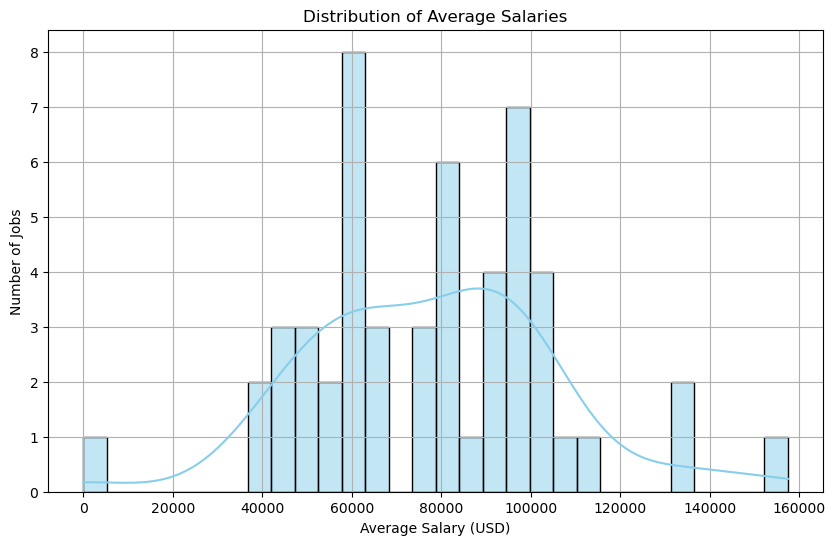

In [7]:
# -----------------------------------------------
# 📊 Histogram of Average Salaries
# -----------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df["avg_salary"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Average Salaries")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Number of Jobs")
plt.grid(True)
plt.show()

C:\Temp\ipykernel_1916\3564834035.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x="Job Title", y="avg_salary", palette="Set2")


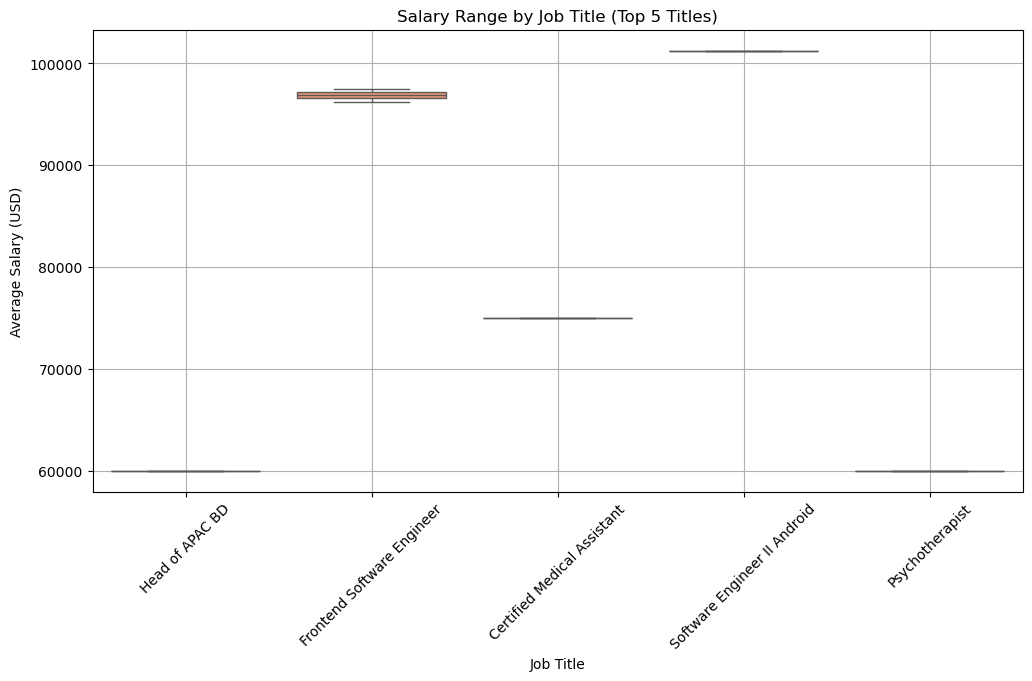

In [8]:
# -----------------------------------------------
# 📦 Boxplot of Salaries by Job Title (Top 5)
# -----------------------------------------------
top_titles = df["Job Title"].value_counts().nlargest(5).index
filtered_df = df[df["Job Title"].isin(top_titles)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x="Job Title", y="avg_salary", palette="Set2")
plt.title("Salary Range by Job Title (Top 5 Titles)")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Job Title")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
# -----------------------------------------------
# 💾 Save Salary-Enriched Dataset (Optional)
# -----------------------------------------------
df.to_json("../data/jobs_with_salary.json", orient="records", indent=4)